# Binomial Trees

The two most popular models for using binomial trees to price options are 
- Cox Ross and Ingersol (1979) (CRR for short) introduced a model whose extra degree of freedom is to set $$ud=1$$ thus $$ u=e^{\sigma \sqrt{\Delta t}},\quad d=e^{-\sigma\sqrt{\Delta t}},\quad 
q=\frac{e^{r\Delta t}-d}{u-d} $$
- Rendleman and Bartter (1979) choose $$q=\frac12$$ and so $$u=e^{(r-\tfrac12\sigma^2)\Delta t+\sigma\sqrt{\Delta t}},\quad d=e^{(r-\tfrac12\sigma^2)\Delta t-\sigma \sqrt{\Delta t}}. $$

We wish to generate a stock price tree, so denote the value of the underlying asset after timestep $i$ and upstate $j$ by $S_{ij}$ and we have that:
$$
S_{ij}=S_0u^jd^{i-j}
$$
First start with headers:

In [1]:
#include <iostream>
#include <iomanip>
#include <fstream>
#include <cmath>
#include <vector>
#include <algorithm>
using namespace std;

Now declare and initialise the Black Scholes parameters for your chosen problem. Here we are going to value a 
Black Scholes vanilla European call option with, $S_0=100$, $X=100$, $T=1$, $r=0.06$ and $\sigma=0.2$, so declare variables
for each of these. Next add in an integer to store the number of steps in the tree and call it $n$.
Finally add in some local variable to describe the tree, so we have the timestep length $dt$,
$u$, $d$ and $q$. Your code should look like:-

In [2]:
{
    // declare and initialise Black Scholes parameters
    double S0=100.,X=100.,T=1.,r=0.06,sigma=0.2;
    // declare and initialise tree paramaters (steps in tree)
    int n=3;
    // declare and initialise local variables (u,d,q)
    double dt,u,d,q;
    dt = T/n;
    u = exp(sigma*sqrt(dt));
    d = exp(-sigma*sqrt(dt));
    q = (exp(r*dt)-d)/(u-d);
}

Then calculate the values for $dt$, $u$, $d$ and $q$, using the appropriate formula, you should check the value of these against those
found in my lecture notes.

Next we need to create some storage for the values of the stock and option value at each node in the tree. Declare a _vector of vectors_ `stockTree` and `valueTree`, 
into which we will place our stock price and option values.  They should be initialised to an $n+1\times n+1$ 2D array, and $n$ is the number of nodes in the tree.

Now use a `for` loop and the function `pow` to input the value of the stock at each node in the tree, 
where $$S_{i,j} \rightarrow \text{stockTree[i][j]},$$
and then setup the payoff of the option
$$
 V_{n,j}=\max(S_{n,j}-X,0.).
$$
 

In [3]:
{
    // declare and initialise Black Scholes parameters
    double S0=100.,X=100.,T=1.,r=0.06,sigma=0.2;
    // declare and initialise tree paramaters (steps in tree)
    int n=3;
    // declare and initialise local variables (u,d,q)
    double dt,u,d,q;
    dt = T/n;
    u = exp(sigma*sqrt(dt));
    d = exp(-sigma*sqrt(dt));
    q = (exp(r*dt)-d)/(u-d);
    // create storage for the stock price tree and option price tree
    vector<vector<double>> stockTree(n+1,vector<double>(n+1));
    vector<vector<double>> valueTree(n+1,vector<double>(n+1));
    // setup and initialise the stock price tree
    for(int i=0;i<=n;i++)
    {
        for(int j=0;j<=i;j++)
        {
            stockTree[i][j]=S0*pow(u,j)*pow(d,i-j);
        }
    }
    // setup and initialise the final conditions on the option price tree
    for(int j=0;j<=n;j++)
    {
        valueTree[n][j]=max(stockTree[n][j]-X,0.);
        cout << n << " " << j << " " << valueTree[n][j] << endl;
    }
    // loop through time levels, setting the option price at each node in the tree

    // output the estimated option price

}

3 0 0
3 1 0
3 2 12.2401
3 3 41.3982


Now we need to loop **backwards** through the tree to generate the value at each node using the equation:
 $$
 V_{ij}=e^{-r\Delta t}(qV_{i+1,j+1}+(1-q)V_{i+1,j}).
 $$
 

In [4]:
{
    // declare and initialise Black Scholes parameters
    double S0=100.,X=100.,T=1.,r=0.06,sigma=0.2;
    // declare and initialise tree paramaters (steps in tree)
    int n=3;
    // declare and initialise local variables (u,d,q)
    double dt,u,d,q;
    dt = T/n;
    u = exp(sigma*sqrt(dt));
    d = exp(-sigma*sqrt(dt));
    q = (exp(r*dt)-d)/(u-d);
    // create storage for the stock price tree and option price tree
    vector<vector<double>> stockTree(n+1,vector<double>(n+1));
    vector<vector<double>> valueTree(n+1,vector<double>(n+1));
    // setup and initialise the stock price tree
    for(int i=0;i<=n;i++)
    {
        for(int j=0;j<=i;j++)
        {
            stockTree[i][j]=S0*pow(u,j)*pow(d,i-j);
        }
    }
    // setup and initialise the final conditions on the option price tree
    for(int j=0;j<=n;j++)
    {
        valueTree[n][j]=max(stockTree[n][j]-X,0.);
    }
    // loop through time levels, setting the option price at each node in the tree
    for(int i=n-1;i>=0;i--)
    {
        for(int j=0;j<=i;j++)
        {
            valueTree[i][j] = exp(-r*dt)*( q*valueTree[i+1][j+1] + (1-q)*valueTree[i+1][j]);
        }
    }
    // output the estimated option price
    cout << " V(S="<<S0<<",t=0) = " << valueTree[0][0] << endl;
    /** OUTPUT
     V *(S=100,t=0) = 11.552
     */
}

 V(S=100,t=0) = 11.552


# Tasks

- Create a function returning the value of the binomial tree for a set of given parameters.
- Write a code storing two time-levels, and compare (at every stage if needed) with the previous code.
- Is it possible to store just one time-level? Try to write a code for this.
- Do you notice any difference (time taken for computation) between the codes with different storage requirements?

Now let's put that code in a function

In [5]:
double binomialOptionValue(
    // Black Scholes parameters
    double S0,
    double X,
    double T,
    double r,
    double sigma,
    // Steps in tree
    int n
)
{
    // declare and initialise local variables (u,d,q)
    double dt,u,d,q;
    dt = T/n;
    u = exp(sigma*sqrt(dt));
    d = exp(-sigma*sqrt(dt));
    q = (exp(r*dt)-d)/(u-d);
    // create storage for the stock price tree and option price tree
    vector<vector<double>> stockTree(n+1,vector<double>(n+1));
    vector<vector<double>> valueTree(n+1,vector<double>(n+1));
    // setup and initialise the stock price tree
    for(int i=0;i<=n;i++)
    {
        for(int j=0;j<=i;j++)
        {
            stockTree[i][j]=S0*pow(u,j)*pow(d,i-j);
        }
    }
    // setup and initialise the final conditions on the option price tree
    for(int j=0;j<=n;j++)
    {
        valueTree[n][j]=max(stockTree[n][j]-X,0.);
    }
    // loop through time levels, setting the option price at each node in the tree
    for(int i=n-1;i>=0;i--)
    {
        for(int j=0;j<=i;j++)
        {
            valueTree[i][j] = exp(-r*dt)*( q*valueTree[i+1][j+1] + (1-q)*valueTree[i+1][j]);
        }
    }
    // return the estimated option price
    return valueTree[0][0];
}

In [6]:
{
    // declare and initialise Black Scholes parameters
    double S0=100.,X=100.,T=1.,r=0.06,sigma=0.2;
    // declare and initialise tree paramaters (steps in tree)
    int n=3;
    // output the estimated option price
    cout << " V(S="<<S0<<",t=0) = " << binomialOptionValue(S0,X,T,r,sigma,n) << endl;
    /** OUTPUT
     V *(S=100,t=0) = 11.552
     */
}

 V(S=100,t=0) = 11.552


You could do this without storing all those values. We also introduce a template to solve for a generic payoff.

In [7]:
template < class F >
double binomialOptionValueAdvanced(
    // Black Scholes parameters
    double S0,
    double T,
    double r,
    double sigma,
    // Steps in tree
    int n,
    // generic payoff
    const F &payoff
)
{
    // declare and initialise local variables (u,d,q)
    double dt,u,d,q;
    dt = T/n;
    u = exp(sigma*sqrt(dt));
    d = exp(-sigma*sqrt(dt));
    q = (exp(r*dt)-d)/(u-d);
    // create storage for the option price
    vector<double> valueTree(n+1);
    
    // setup and initialise the final conditions on the option price tree
    for(int j=0;j<=n;j++)
    {
        valueTree[j]=payoff(S0*pow(u,j)*pow(d,n-j));
    }
    // loop through time levels, setting the option price at each node in the tree
    for(int i=n-1;i>=0;i--)
    {
        for(int j=0;j<=i;j++)
        {
            valueTree[j] = exp(-r*dt)*( q*valueTree[j+1] + (1-q)*valueTree[j]);
        }
    }
    // return the estimated option price
    return valueTree[0];
}

 The syntax here is to introduce a _lambda_ function, the syntax is:
 ~~~
 auto functionName = [ capture list ] ( argument list ) { function definition } ;
 ~~~
 so for a simple call option payoff, we want to
 - capture the strike price $X$,
 - make it a function of $S$, so the argument list is `double S`
 - define the function to return $\max(S-X,0)$
 which looks like
 ~~~
 auto callPayoff = [ X ] ( double S ) { return max(S-X,0.); } ;
 ~~~

In [8]:
{
    // declare and initialise Black Scholes parameters
    double S0=100.,X=100.,T=1.,r=0.06,sigma=0.2;
    // declare and initialise tree paramaters (steps in tree)
    int n=3;
    auto callPayoff = [X](double S){return max(S-X,0.);};
    // output the estimated option price
    cout << " V(S="<<S0<<",t=0) = " << binomialOptionValueAdvanced(S0,T,r,sigma,n,callPayoff) << endl;
    /** OUTPUT
     V *(S=100,t=0) = 11.552
     */
}

 V(S=100,t=0) = 11.552


# Convergence Properties



Now we wish to investigate what happens when $N$ is increasing. Write the following loop in your code to output
some results to file, you will need to adjust the output filename depending on you preference for where the file should be saved


In [9]:
#include "math60082_lab_plot_loader.hpp"

In [10]:
{
    // open up a file stream to write data
    ofstream output;
    // here we are going to use comma separated variables, so end the filename with .csv

    // I'm outputing to current working directory
    output.open("test-7-1.csv");

    if(!output.is_open())
    {
        // NOTE!!!! The file will not open unless the directory exists!!!
        cout << " File not opened \n";
        // stop the program here
        throw;
    }
    // write N vs C(S0,t=0,N) to a file
    // each column must be separated by a comma
    // each row goes on a new line
    double S0=100.,X=100.,T=1.,r=0.06,sigma=0.2;
    auto callPayoff = [X](double S){return max(S-X,0.);};
    for(int n=10;n<=1000;n++)
    {
        output << n << " , " << binomialOptionValueAdvanced(S0,T,r,sigma,n,callPayoff) <<endl;
    }
    // file write successful then close file
    cout << " File write successful \n";
    output.close();
}

 File write successful 


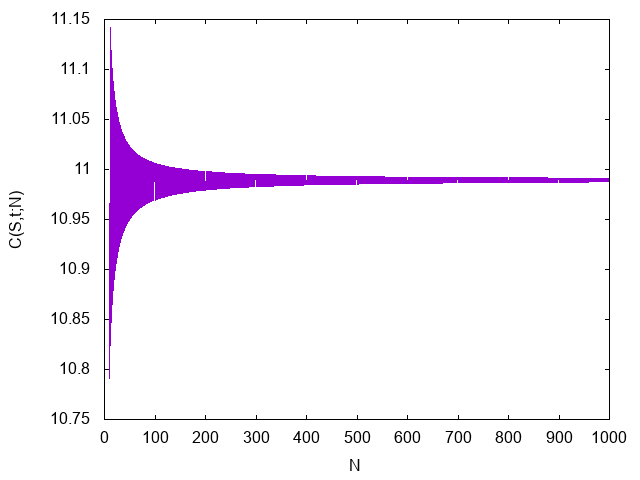

In [11]:
MATH60082::gnuplotImage fig1;
{
    std::stringstream ss;
    ss << "set datafile separator ','" << endl;
    ss << "set xlabel 'N'" << endl;
    ss << "set ylabel 'C(S,t;N)'" << endl;
    ss << "unset key"<< endl;
    ss << "p'test-7-1.csv' u 1:2 w l";
    fig1 = MATH60082::GnuplotWidget::plotCommand(&ss);
    
}
fig1

In [12]:
{
    // open up a file stream to write data
    ofstream output;
    // here we are going to use comma separated variables, so end the filename with .csv

    // I'm outputing to current working directory
    output.open("test-7-2.csv");

    if(!output.is_open())
    {
        // NOTE!!!! The file will not open unless the directory exists!!!
        cout << " File not opened \n";
        // stop the program here
        throw;
    }
    // write N vs C(S0,t=0,N) to a file
    // each column must be separated by a comma
    // each row goes on a new line
    double S0=97.3467,X=100.,T=1.,r=0.06,sigma=0.2;
    auto callPayoff = [X](double S){return max(S-X,0.);};
    for(int n=10;n<=1000;n++)
    {
        output << n << " , " << binomialOptionValueAdvanced(S0,T,r,sigma,n,callPayoff) <<endl;
    }
    // file write successful then close file
    cout << " File write successful \n";
    output.close();
}

 File write successful 


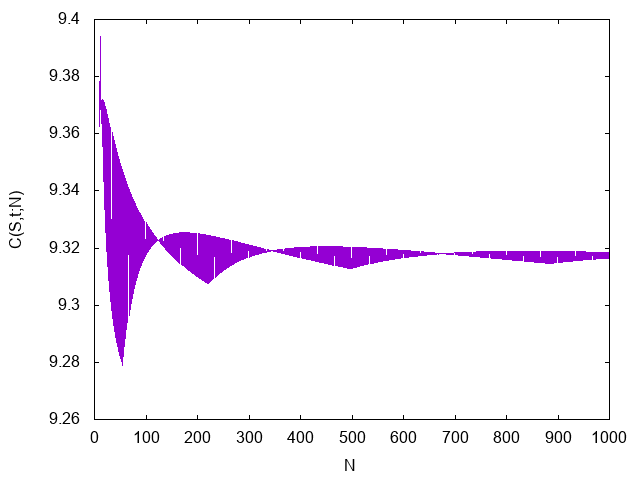

In [13]:
MATH60082::gnuplotImage fig2;
{
    std::stringstream ss;
    ss << "set datafile separator ','" << endl;
    ss << "set xlabel 'N'" << endl;
    ss << "set ylabel 'C(S,t;N)'" << endl;
    ss << "unset key"<< endl;
    ss << "p'test-7-2.csv' u 1:2 w l";
    fig2 = MATH60082::GnuplotWidget::plotCommand(&ss);
    
}
fig2

Now try with a different payoff, 
$$
BC(S,T) = \left\{    
\begin{array}{cc}
A & \text{ if } S>X \\
0 & \text{ if } S\leq X
\end{array}
\right.
$$

In [14]:
{
    // open up a file stream to write data
    ofstream output;
    // here we are going to use comma separated variables, so end the filename with .csv

    // I'm outputing to current working directory
    output.open("test-7-3.csv");

    if(!output.is_open())
    {
        // NOTE!!!! The file will not open unless the directory exists!!!
        cout << " File not opened \n";
        // stop the program here
        throw;
    }
    // write N vs C(S0,t=0,N) to a file
    // each column must be separated by a comma
    // each row goes on a new line
    double S0=97.3467,A=10.,X=100.,T=1.,r=0.06,sigma=0.2;
    auto binaryCallPayoff = [A,X](double S){
        if(S>X)
            return A;
        else
            return 0.;
    };
    for(int n=10;n<=1000;n++)
    {
        output << n << " , " << binomialOptionValueAdvanced(S0,T,r,sigma,n,binaryCallPayoff) <<endl;
    }
    // file write successful then close file
    cout << " File write successful \n";
    output.close();
}

 File write successful 


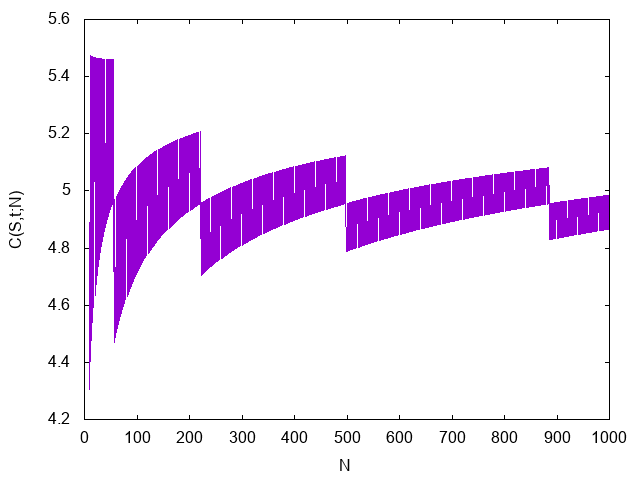

In [15]:
MATH60082::gnuplotImage fig3;
{
    std::stringstream ss;
    ss << "set datafile separator ','" << endl;
    ss << "set xlabel 'N'" << endl;
    ss << "set ylabel 'C(S,t;N)'" << endl;
    ss << "unset key"<< endl;
    ss << "p'test-7-3.csv' u 1:2 w l";
    fig3 = MATH60082::GnuplotWidget::plotCommand(&ss);
    
}
fig3

The shape looks quite different, so why is this? The reason is to do with the discrete approximation of the payoff as compared to the continuous value we are trying to solve for. In this case for the binary option, we have a _rectangle_ shape for area under the payoff, where as in a call option the area under the payoff forms a _triangle_.

The major error that we are seeing here is due to the value of the payoff at the node closest to the strike price. There are some suggestions in the literature as to how this should be tackled. For instance try the payoff:
$$
V_{n,j} = \left\{\begin{array}{ccc}
0 & \text{ if } &S_j^N<2X - S^N_{j+1}\\
&&\\
A\frac{S^N_{j+1} + S^N_j - 2X}{S^N_{j+1}-S^N_{j-1}} & \text{ if } &2X - S^N_{j+1}\leq  S_j^N  \leq 2X-S^N_{j-1} \\
&&\\
A & \text{ if } &S_j^N > 2X-S^N_{j-1}
\end{array}\right.
$$

In [16]:
{
    
    double S0=97.3467,A=10.,X=100.,T=1.,r=0.06,sigma=0.2;
    int n=10;
    double dt,u,d;
    dt = T/n;
    u = exp(sigma*sqrt(dt));
    d = exp(-sigma*sqrt(dt));
    
    int jStar = log(X/S0/pow(d,n)) / log(u/d) + 0.5;
    
    for(int j=0;j<=n;j++)
    {
        cout << j << " " << jStar << " " << S0*pow(u,j)*pow(d,n-j) <<endl;
    }
    
}

0 5 51.7189
1 5 58.6926
2 5 66.6067
3 5 75.5879
4 5 85.7802
5 5 97.3467
6 5 110.473
7 5 125.369
8 5 142.274
9 5 161.458
10 5 183.229


In [17]:
{
    // open up a file stream to write data
    ofstream output;
    // here we are going to use comma separated variables, so end the filename with .csv

    // I'm outputing to current working directory
    output.open("test-7-4.csv");

    if(!output.is_open())
    {
        // NOTE!!!! The file will not open unless the directory exists!!!
        cout << " File not opened \n";
        // stop the program here
        throw;
    }
    // write N vs C(S0,t=0,N) to a file
    // each column must be separated by a comma
    // each row goes on a new line
    double S0=97.3467,A=10.,X=100.,T=1.,r=0.06,sigma=0.2;
    for(int n=10;n<=1000;n++)
    {
        auto binaryCallPayoff = [A,X,T,sigma,n](double S){
            double dt,u,d;
            dt = T/n;
            u = exp(sigma*sqrt(dt));
            d = exp(-sigma*sqrt(dt));
    
            double Sj = S;
            double Sjplus = Sj*u/d;
            double Sjminus = Sj*d/u;
  
            if(Sj < 2*X-Sjplus)
                return 0.;
            else if ( Sj>= 2*X-Sjplus && Sj <= 2*X-Sjminus)
                return A*(Sjplus+Sj-2*X)/(Sjplus-Sjminus);
            else                
                return A;

        };
    
        output << n << " , " << binomialOptionValueAdvanced(S0,T,r,sigma,n,binaryCallPayoff) << endl;
    }
    // file write successful then close file
    cout << " File write successful \n";
    output.close();
}

 File write successful 


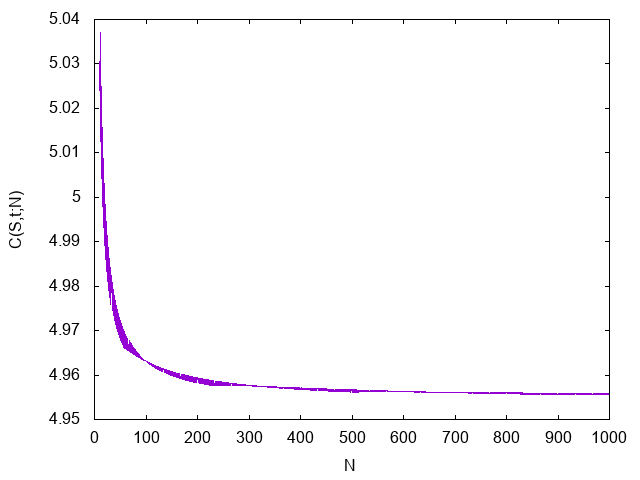

In [18]:
MATH60082::gnuplotImage fig4;
{
    std::stringstream ss;
    ss << "set datafile separator ','" << endl;
    ss << "set xlabel 'N'" << endl;
    ss << "set ylabel 'C(S,t;N)'" << endl;
    ss << "unset key"<< endl;
    ss << "p'test-7-4.csv' u 1:2 w l";
    fig4 = MATH60082::GnuplotWidget::plotCommand(&ss);
    
}
fig4

Convergence is much improved!

Now try using the same idea on a call option. If the midpoint between nodes are given by 
$$
S_{j+1/2}^n = \frac12 (S_{j+1}^n+S_j^n)
$$
and
$$
S_{j-1/2}^n = \frac12 (S_{j}^n+S_{j-1}^n),
$$
then the payoff at the node closest to the strike price can be found by integrating
$$
\int_X^{S^n_{j+1/2}} (S-X) dS
$$
so we get
$$
V_j^n = \frac{ \frac12 (S_{j+1/2}-X)^2 }{S_{j+1/2}^n-S_{j-1/2}^n }.
$$

In [19]:
{
    // open up a file stream to write data
    ofstream output;
    // here we are going to use comma separated variables, so end the filename with .csv

    // I'm outputing to current working directory
    output.open("test-7-4.csv");

    if(!output.is_open())
    {
        // NOTE!!!! The file will not open unless the directory exists!!!
        cout << " File not opened \n";
        // stop the program here
        throw;
    }
    // write N vs C(S0,t=0,N) to a file
    // each column must be separated by a comma
    // each row goes on a new line
    double S0=97.3467,A=10.,X=100.,T=1.,r=0.06,sigma=0.2;
    for(int n=10;n<=1000;n++)
    {
        auto binaryCallPayoff = [A,X,T,sigma,n](double S){
            double dt,u,d;
            dt = T/n;
            u = exp(sigma*sqrt(dt));
            d = exp(-sigma*sqrt(dt));
    
            double Sj = S;
            double Sjplus = Sj*u/d;
            double Sjminus = Sj*d/u;
  
            if(Sj < 2*X-Sjplus)
                return 0.;
            else if ( Sj>= 2*X-Sjplus && Sj <= 2*X-Sjminus)
                return (0.5*(Sjplus+Sj)-X)*(0.5*(Sjplus+Sj)-X)/(Sjplus-Sjminus);
            else                
                return Sj-X;

        };
    
        output << n << " , " << binomialOptionValueAdvanced(S0,T,r,sigma,n,binaryCallPayoff) << endl;
    }
    // file write successful then close file
    cout << " File write successful \n";
    output.close();
}

 File write successful 


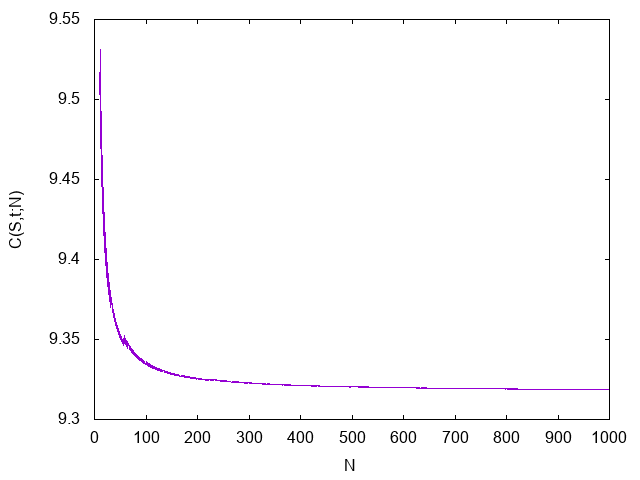

In [20]:
MATH60082::gnuplotImage fig4;
{
    std::stringstream ss;
    ss << "set datafile separator ','" << endl;
    ss << "set xlabel 'N'" << endl;
    ss << "set ylabel 'C(S,t;N)'" << endl;
    ss << "unset key"<< endl;
    ss << "p'test-7-4.csv' u 1:2 w l";
    fig4 = MATH60082::GnuplotWidget::plotCommand(&ss);
    
}
fig4

Again this is looking much smoother as compared to the previous picture.